In [20]:
import pykoop
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import scipy
import seaborn as sns
import sklearn
import pysindy as ps
from sklearn.linear_model import Lasso
from tools import plot_main, plot_clustered_kuramoto, generate_kuramoto_cluster_data_sin_cos

# 数据生成

In [57]:
N=12
n_clusters=2  # 团数
K_intra=5
K_inter=0.1
noise=0
dt=0.01

In [22]:
# 多时间序列采样
T=5
batch = 1000
t_list = []
x_data = []
for seed in range(batch):
    x_train, theta_hist, t, K_matrix = generate_kuramoto_cluster_data_sin_cos(
        N=N, n_clusters=n_clusters, K_intra=K_intra, K_inter=K_inter, dt=dt, T=T, noise=noise, random_seed1=0, random_seed2=seed
    )
    x_data.append(x_train)
    t_list.append(t)

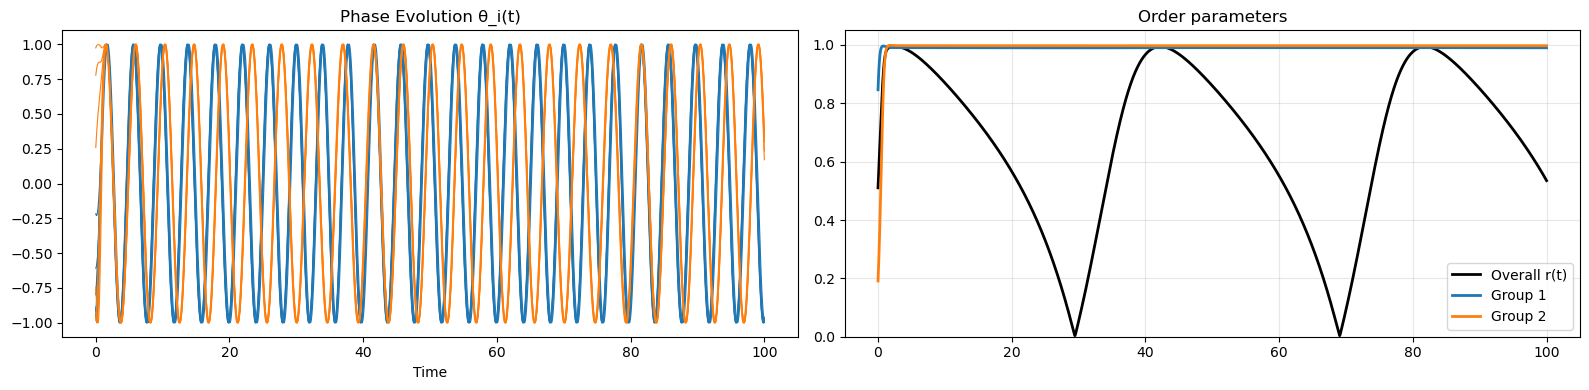

In [58]:
# 单时间序列采样
X_embed, theta_hist, t, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=n_clusters,  # 团数
    K_intra=K_intra,   # 团内耦合
    K_inter=K_inter,   # 团间耦合
    noise=noise,
    T=100,
    random_seed1=0, random_seed2=0,
    dt=dt
)

x_data = X_embed


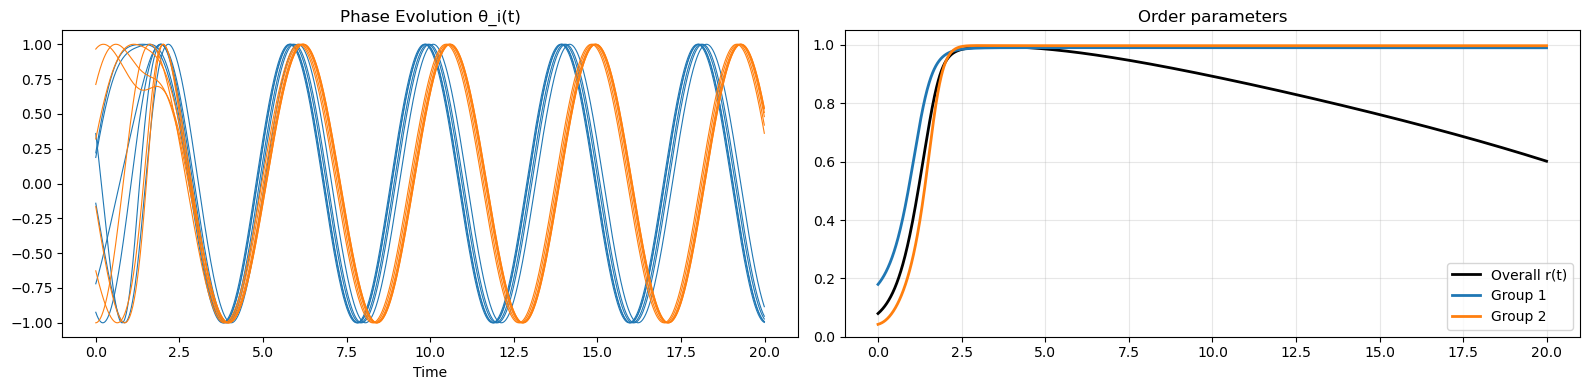

In [59]:
# 测试集
X_embed, theta_hist, t, K_matrix = plot_clustered_kuramoto(
    N=N,          # 振子数
    n_clusters=n_clusters,  # 团数
    K_intra=K_intra,   # 团内耦合
    K_inter=K_inter,   # 团间耦合
    noise=noise,
    T=20,
    random_seed1=0, random_seed2=1234,
    dt=dt
)

x_test = X_embed

# SINDy

In [74]:
# 观测函数升维
ide = ps.IdentityLibrary()
fourier = ps.FourierLibrary(n_frequencies=1)
library_functions = [
    lambda x: x,
    lambda x: np.sin(x),
    lambda x: np.cos(x),
]
custom_library = ps.CustomLibrary(library_functions=library_functions)
ode_lib = ps.PolynomialLibrary(degree=1,include_bias=True)
library = ide + fourier



library.fit(x_data)
x_data_lift = library.transform(x_data)
names = library.get_feature_names()
len(x_data_lift), x_data_lift[0].shape, names

(10000,
 (72,),
 ['x0',
  'x1',
  'x2',
  'x3',
  'x4',
  'x5',
  'x6',
  'x7',
  'x8',
  'x9',
  'x10',
  'x11',
  'x12',
  'x13',
  'x14',
  'x15',
  'x16',
  'x17',
  'x18',
  'x19',
  'x20',
  'x21',
  'x22',
  'x23',
  'sin(1 x0)',
  'cos(1 x0)',
  'sin(1 x1)',
  'cos(1 x1)',
  'sin(1 x2)',
  'cos(1 x2)',
  'sin(1 x3)',
  'cos(1 x3)',
  'sin(1 x4)',
  'cos(1 x4)',
  'sin(1 x5)',
  'cos(1 x5)',
  'sin(1 x6)',
  'cos(1 x6)',
  'sin(1 x7)',
  'cos(1 x7)',
  'sin(1 x8)',
  'cos(1 x8)',
  'sin(1 x9)',
  'cos(1 x9)',
  'sin(1 x10)',
  'cos(1 x10)',
  'sin(1 x11)',
  'cos(1 x11)',
  'sin(1 x12)',
  'cos(1 x12)',
  'sin(1 x13)',
  'cos(1 x13)',
  'sin(1 x14)',
  'cos(1 x14)',
  'sin(1 x15)',
  'cos(1 x15)',
  'sin(1 x16)',
  'cos(1 x16)',
  'sin(1 x17)',
  'cos(1 x17)',
  'sin(1 x18)',
  'cos(1 x18)',
  'sin(1 x19)',
  'cos(1 x19)',
  'sin(1 x20)',
  'cos(1 x20)',
  'sin(1 x21)',
  'cos(1 x21)',
  'sin(1 x22)',
  'cos(1 x22)',
  'sin(1 x23)',
  'cos(1 x23)'])

In [75]:
sr3_optimizer = ps.SR3(reg_weight_lam=0.2, regularizer="l1")
lasso_optimizer = Lasso(alpha=0.01, max_iter=2000, fit_intercept=False)

model = ps.SINDy(feature_library=ide, optimizer=lasso_optimizer, discrete_time=False)
model.fit(x_data_lift, t=dt, feature_names=names)
model.print()

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+00, tolerance: 1.229e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e+00, tolerance: 1.224e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

(x0)' = -1.434 x12 + -0.034 x13 + -0.011 x14 + -0.072 x15
(x1)' = -0.790 x16 + -0.773 x17
(x2)' = -0.452 x12 + -0.779 x13 + -0.067 x14 + -0.216 x16 + -0.038 x17
(x3)' = -0.028 x12 + -0.007 x13 + -1.516 x15
(x4)' = 0.005 x8 + -0.069 x12 + -0.042 x15 + -1.446 x16
(x5)' = 0.074 x4 + -0.212 x16 + -1.315 x17
(x6)' = 0.006 x1 + -0.003 x17 + -1.385 x18 + -0.023 x23
(x7)' = 0.006 x1 + 0.005 x5 + -1.391 x20
(x8)' = 0.010 x4 + 0.001 x5 + -1.390 x20
(x9)' = 0.011 x3 + -0.028 x18 + -1.381 x21
(x10)' = 0.010 x4 + -0.540 x19 + -0.523 x20 + -0.148 x22 + -0.183 x23
(x11)' = 0.004 x1 + -0.002 x17 + -1.406 x23
(x12)' = 1.093 x0 + 0.010 x2 + 0.447 x4
(x13)' = 1.545 x1
(x14)' = 0.579 x0 + 0.679 x1 + 0.270 x2 + 0.023 x5
(x15)' = 1.419 x3 + 0.132 x4
(x16)' = 1.565 x4 + 0.012 x22
(x17)' = 0.045 x1 + 1.499 x5
(x18)' = 1.405 x6 + 0.002 x9 + 0.012 x13
(x19)' = 0.788 x7 + 0.593 x9 + 0.001 x16 + 0.016 x17 + 0.027 x18
(x20)' = 0.659 x7 + 0.719 x9 + 0.016 x16 + 0.006 x17 + 0.032 x21
(x21)' = 1.410 x9 + 0.014 x13
(x

/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+00, tolerance: 2.165e-01
  model = cd_fast.enet_coordinate_descent(


In [76]:
# library.fit(x_test)
# x_test_lift = library.transform(x_test)
model.score(x_data_lift, t=dt)

0.8867065514653683

In [72]:
x_data_lift.shape

((10000, 72), (2000, 72))

<Axes: >

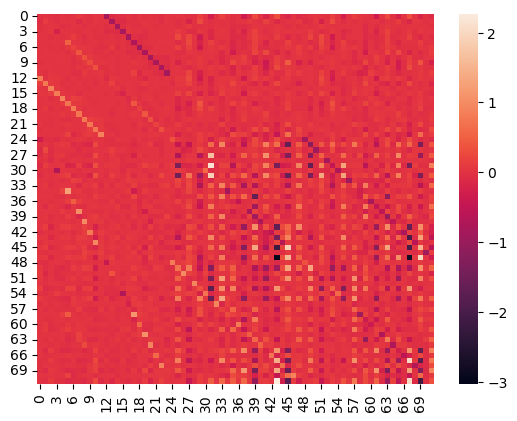

In [44]:
A = model.coefficients()
A_exp = scipy.linalg.expm(A)
sns.heatmap(A_exp)

# 预测

/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_25435/2335028362.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


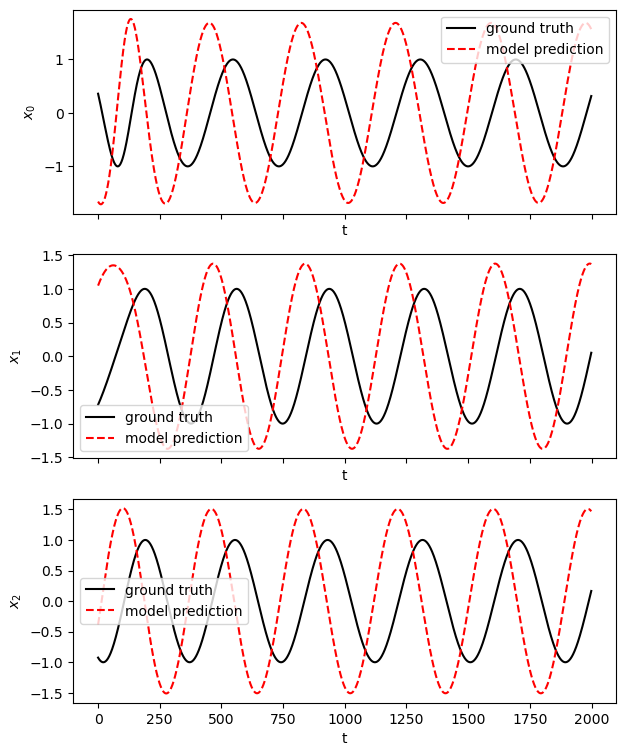

In [60]:
X_test_predicted = model.predict(x_test)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(x_test[:, i], "k", label="ground truth")
    axs[i].plot(X_test_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$x_{}$".format(i))
fig.show()

/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_42452/4018596701.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


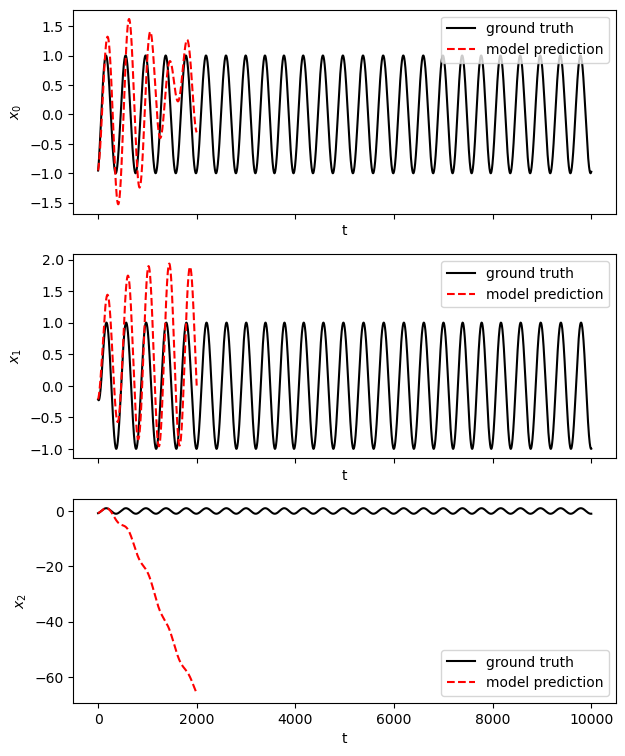

In [78]:
#x_test_lift = library.transform(x_test)
init_data = x_data_lift[0,:]
X_data_predicted = model.simulate(init_data,t) 
#X_test_predicted = model.simulate(init_data,len(x_test)-1)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(7, 9))
for i in range(3):
    axs[i].plot(x_data[:, i], "k", label="ground truth")
    axs[i].plot(X_data_predicted[:, i], "r--", label="model prediction")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel=r"$x_{}$".format(i))
fig.show()

# 矩阵稀疏性

In [79]:
from tools import matrix_l0_norm_corrected, matrix_l1_norm_manual
matrix_l1_norm_manual(A.T)

np.float64(32.02198122799577)

In [80]:
matrix_l0_norm_corrected(A.T,0.01)

63

# 特征谱与SVD分析

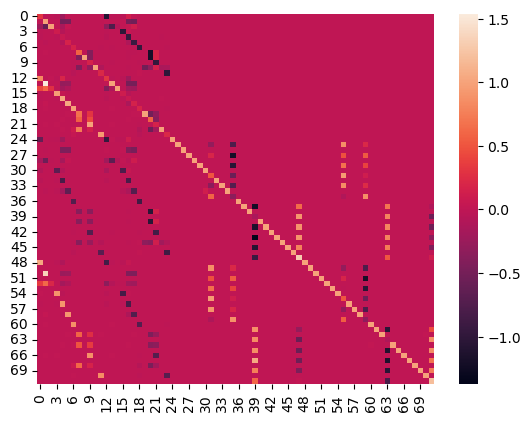

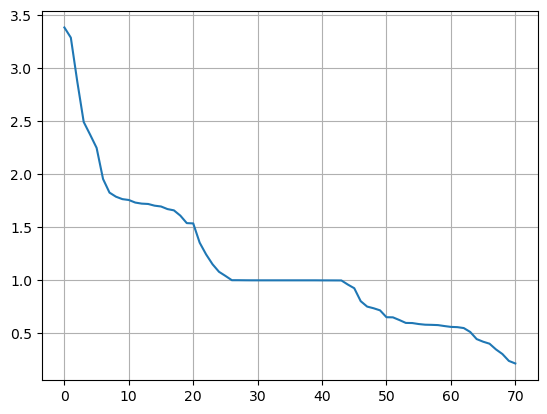

[3.38670376 3.29069694 2.87633161 2.49452208 2.3744747 ]


In [81]:
A = model.coefficients()
A_exp = scipy.linalg.expm( A)
sns.heatmap(A_exp)

U,S,V = np.linalg.svd(A_exp)
plt.figure()
plt.plot(S[1:])
plt.grid(True)
plt.show()
print(S[1:6])

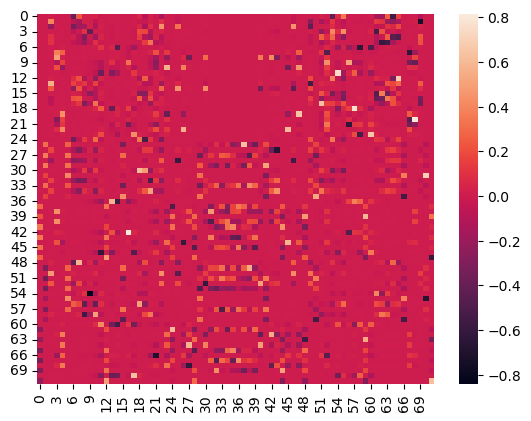

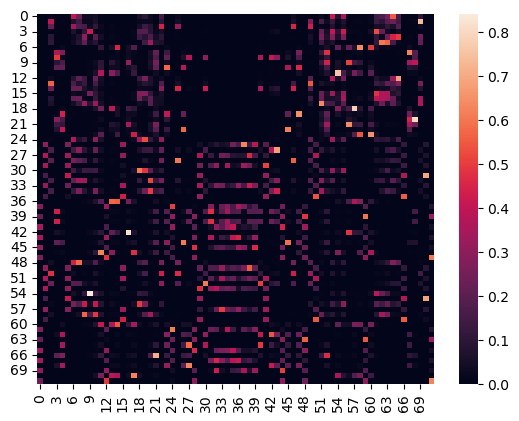

In [82]:
U_abs = np.abs(U)
plt.figure()
sns.heatmap(np.real(U))
plt.show()
plt.figure()
sns.heatmap(U_abs)
plt.show()

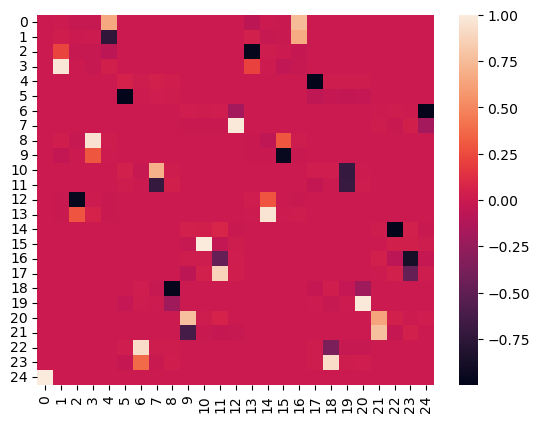

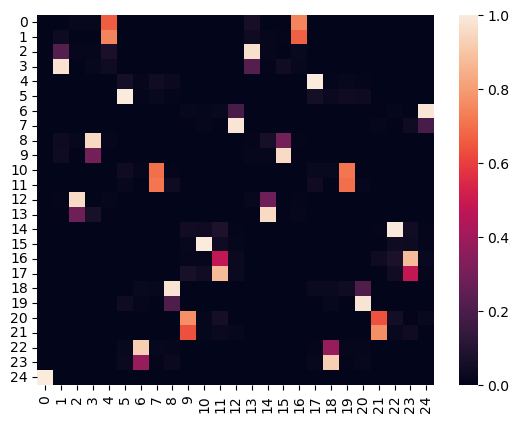

In [64]:
V_abs = np.abs(V)
plt.figure()
sns.heatmap(np.real(V))
plt.show()
plt.figure()
sns.heatmap(V_abs)
plt.show()

# Lorzen

In [1]:
import warnings
from contextlib import contextmanager
from copy import copy
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import LinAlgWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import Lasso

import pysindy as ps
from pysindy.utils import enzyme
from pysindy.utils import lorenz
from pysindy.utils import lorenz_control

if __name__ != "testing":
    t_end_train = 10
    t_end_test = 15
else:
    t_end_train = 0.04
    t_end_test = 0.04

data = (Path() / "../data").resolve()


@contextmanager
def ignore_specific_warnings():
    filters = copy(warnings.filters)
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    warnings.filterwarnings("ignore", category=LinAlgWarning)
    warnings.filterwarnings("ignore", category=UserWarning)
    yield
    warnings.filters = filters


if __name__ == "testing":
    import sys
    import os

    sys.stdout = open(os.devnull, "w")

In [2]:
np.random.seed(100)
integrator_keywords = {}
integrator_keywords["rtol"] = 1e-12
integrator_keywords["method"] = "LSODA"
integrator_keywords["atol"] = 1e-12

# Generate measurement data
dt = 0.002

t_train = np.arange(0, t_end_train, dt)
x0_train = [-8, 8, 27]
t_train_span = (t_train[0], t_train[-1])
x_train = solve_ivp(
    lorenz, t_train_span, x0_train, t_eval=t_train, **integrator_keywords
).y.T

x_train.shape

(5000, 3)

In [8]:
ode_lib = ps.PolynomialLibrary(degree=2,include_bias=False)
ode_lib.fit(x_train)
x_train_new = ode_lib.transform(x_train)
x_train_new.shape, ode_lib.get_feature_names()

((5000, 9),
 ['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2'])

In [12]:
ide = ps.IdentityLibrary()
model = ps.SINDy(feature_library=ide, discrete_time=False)
model.fit(x_train_new, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1
(x1)' = 27.992 x0 + -0.999 x1 + -1.000 x5
(x2)' = -2.666 x2 + 1.000 x4
(x3)' = -19.996 x3 + 19.996 x4
(x4)' = 111.746 x0 + -68.589 x1 + 16.559 x2 + -10.031 x3 + -19.107 x4 + -2.338 x5 + 20.919 x6 + 1.754 x7 + -0.511 x8
(x5)' = 80.548 x0 + -106.102 x1 + -3.098 x2 + 2.539 x3 + -0.145 x4 + -15.246 x5 + -1.557 x6 + 19.555 x7 + -0.286 x8
(x6)' = 533.055 x0 + -329.205 x1 + 83.148 x2 + 20.606 x3 + -64.655 x4 + -13.161 x5 + 36.972 x6 + 8.624 x7 + -3.825 x8
(x7)' = 1617.470 x0 + -623.918 x1 + 0.689 x2 + 6.166 x3 + -55.911 x5 + -3.334 x6 + 23.935 x7 + -0.727 x8
(x8)' = -532.716 x0 + 328.993 x1 + -83.074 x2 + -20.564 x3 + 120.609 x4 + 13.152 x5 + -38.963 x6 + -8.618 x7 + -1.512 x8


In [7]:
model = ps.SINDy(discrete_time=False)
model.fit(x_train, t=dt)
model.print()

(x0)' = -9.999 x0 + 9.999 x1
(x1)' = 27.992 x0 + -0.999 x1 + -1.000 x0 x2
(x2)' = -2.666 x2 + 1.000 x0 x1


<Axes: >

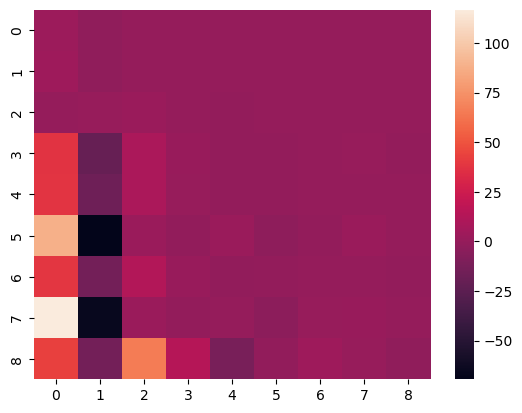

In [18]:

A = model.coefficients()
A_exp= scipy.linalg.expm(A)
sns.heatmap(A_exp)

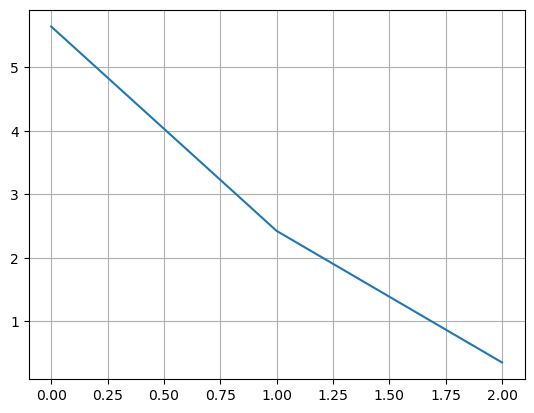

[5.63997635 2.424534   0.35429562]


In [19]:
U,S,V = np.linalg.svd(A_exp[:3, :])
plt.figure()
plt.plot(S)
plt.grid(True)
plt.show()
print(S[:6])

In [216]:
t_test = np.arange(0, t_end_test, dt)
x0_test = np.array([8, 7, 15])
t_test_span = (t_test[0], t_test[-1])
x_test = solve_ivp(
    lorenz, t_test_span, x0_test, t_eval=t_test, **integrator_keywords
).y.T

# Compare SINDy-predicted derivatives with finite difference derivatives
print("Model score: %f" % model.score(x_test, t=dt))

Model score: 1.000000


/var/folders/mw/53dhwskj4zq47dtls4lhht4m0000gn/T/ipykernel_99108/2661361613.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


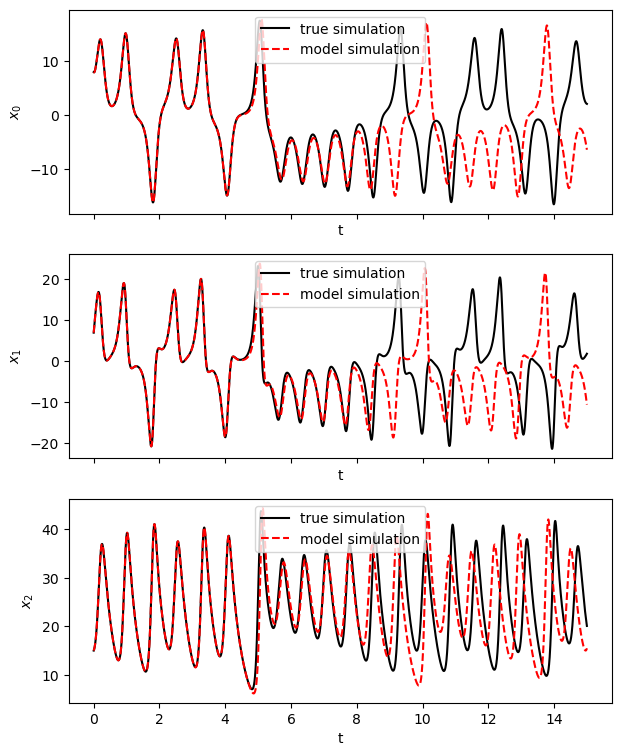

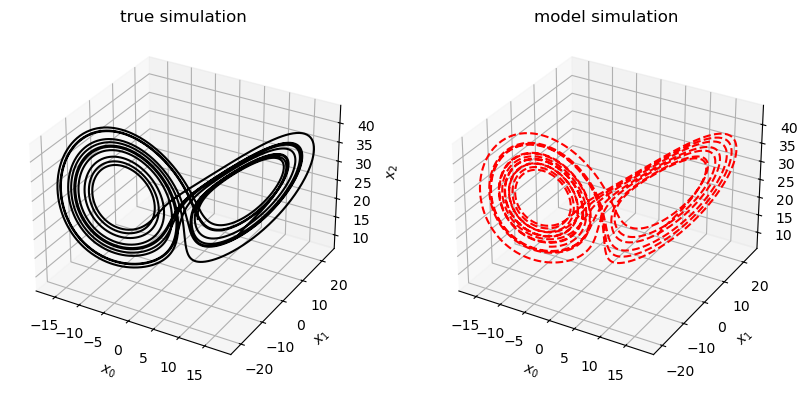

In [217]:
x_test_sim = model.simulate(x0_test, t_test)

fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], "k", label="true simulation")
    axs[i].plot(t_test, x_test_sim[:, i], "r--", label="model simulation")
    axs[i].legend()
    axs[i].set(xlabel="t", ylabel="$x_{}$".format(i))

fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2], "k")
ax1.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$", title="true simulation")

ax2 = fig.add_subplot(122, projection="3d")
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1], x_test_sim[:, 2], "r--")
ax2.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$", title="model simulation")

fig.show()